# Codeforces Rating Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d meruvulikith/codeforces-ratings-classification-and-regression

Dataset URL: https://www.kaggle.com/datasets/meruvulikith/codeforces-ratings-classification-and-regression
License(s): MIT
100%|███████████████████████████████████████| 83.6k/83.6k [00:00<00:00, 160kB/s]
100%|███████████████████████████████████████| 83.6k/83.6k [00:00<00:00, 160kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Codeforces Rating Prediction/codeforces-ratings-classification-and-regression.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Codeforces Rating Prediction')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('classification_df.csv')

In [6]:
df.head()

,userid,rank-type,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,contest9,contest10
0,3143927301,Candidate Master,2078,2055,2115,2047.0,2024.0,2010.0,1953.0,1936.0,2042.0,2045.0
1,1876577621,Master,2194,2114,2152,2179.0,2211.0,2154.0,2170.0,2141.0,2157.0,2209.0
2,6397741793,Master,2120,2206,2147,2234.0,2294.0,2090.0,2089.0,2072.0,2085.0,2114.0
3,3090123616,Master,2224,2222,2166,2116.0,2029.0,2113.0,2104.0,2096.0,2115.0,2163.0
4,9564162806,Master,2128,2120,2072,2018.0,1963.0,2039.0,1932.0,1963.0,1960.0,1886.0


In [7]:
df.shape

(1423, 12)

In [8]:
df.size

17076

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     1423 non-null   int64  
 1   rank-type  1423 non-null   object 
 2   contest1   1423 non-null   int64  
 3   contest2   1423 non-null   int64  
 4   contest3   1423 non-null   int64  
 5   contest4   1422 non-null   float64
 6   contest5   1404 non-null   float64
 7   contest6   1374 non-null   float64
 8   contest7   1343 non-null   float64
 9   contest8   1303 non-null   float64
 10  contest9   1279 non-null   float64
 11  contest10  1252 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 133.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,1423.0,5.544960e+09,2.556707e+09,1.002901e+09,3.385677e+09,5.568463e+09,7.764162e+09,9.998497e+09
contest1,1423.0,2.225569e+03,2.285886e+02,1.029000e+03,2.077000e+03,2.155000e+03,2.314000e+03,3.572000e+03
contest2,1423.0,2.182663e+03,2.478313e+02,1.001000e+03,2.022500e+03,2.121000e+03,2.288000e+03,3.697000e+03
contest3,1423.0,2.144554e+03,2.773429e+02,8.380000e+02,1.984000e+03,2.103000e+03,2.278500e+03,3.569000e+03
contest4,1422.0,2.096829e+03,3.242259e+02,6.830000e+02,1.940250e+03,2.080000e+03,2.248000e+03,3.487000e+03
contest5,1404.0,2.062669e+03,3.584303e+02,5.700000e+02,1.913750e+03,2.069500e+03,2.246250e+03,3.644000e+03
contest6,1374.0,2.044155e+03,3.756589e+02,4.270000e+02,1.894250e+03,2.045500e+03,2.231750e+03,3.833000e+03
contest7,1343.0,2.032603e+03,3.883407e+02,4.390000e+02,1.884500e+03,2.044000e+03,2.221500e+03,3.724000e+03
contest8,1303.0,2.032439e+03,3.743102e+02,3.880000e+02,1.877500e+03,2.041000e+03,2.213000e+03,3.727000e+03
contest9,1279.0,2.018511e+03,3.856802e+02,4.530000e+02,1.855000e+03,2.033000e+03,2.201500e+03,3.783000e+03


In [11]:
df.isnull().sum()

userid         0
rank-type      0
contest1       0
contest2       0
contest3       0
contest4       1
contest5      19
contest6      49
contest7      80
contest8     120
contest9     144
contest10    171
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

userid       1423
rank-type       8
contest1      571
contest2      661
contest3      701
contest4      768
contest5      791
contest6      791
contest7      797
contest8      786
contest9      781
contest10     775
dtype: int64

In [14]:
df['rank-type'].value_counts()

rank-type
Master                        628
Candidate Master              411
Grandmaster                   159
International Master          120
International Grandmaster      87
Legendary Grandmaster          15
Pupil                           2
Newbie                          1
Name: count, dtype: int64

## Data Visualization

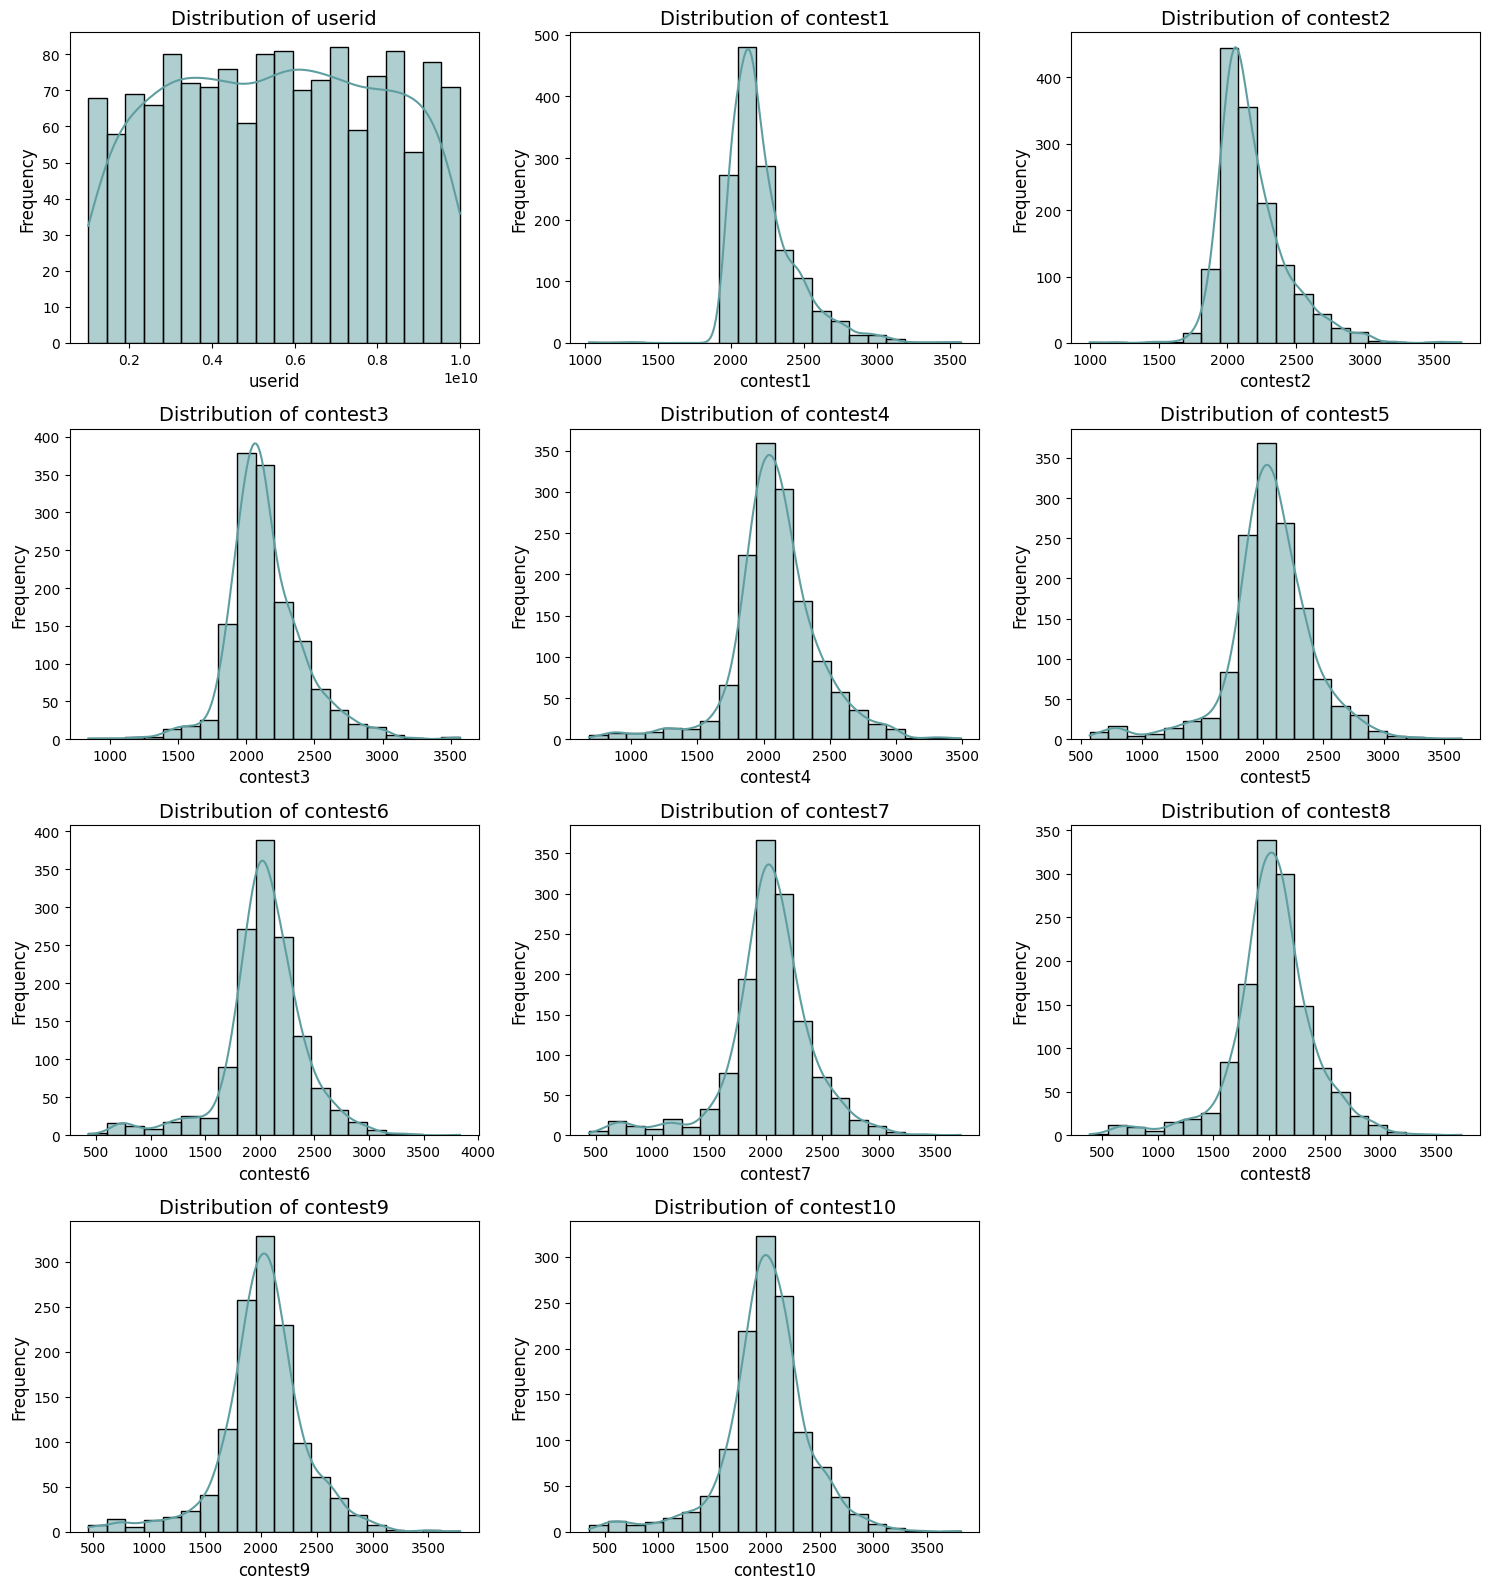

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

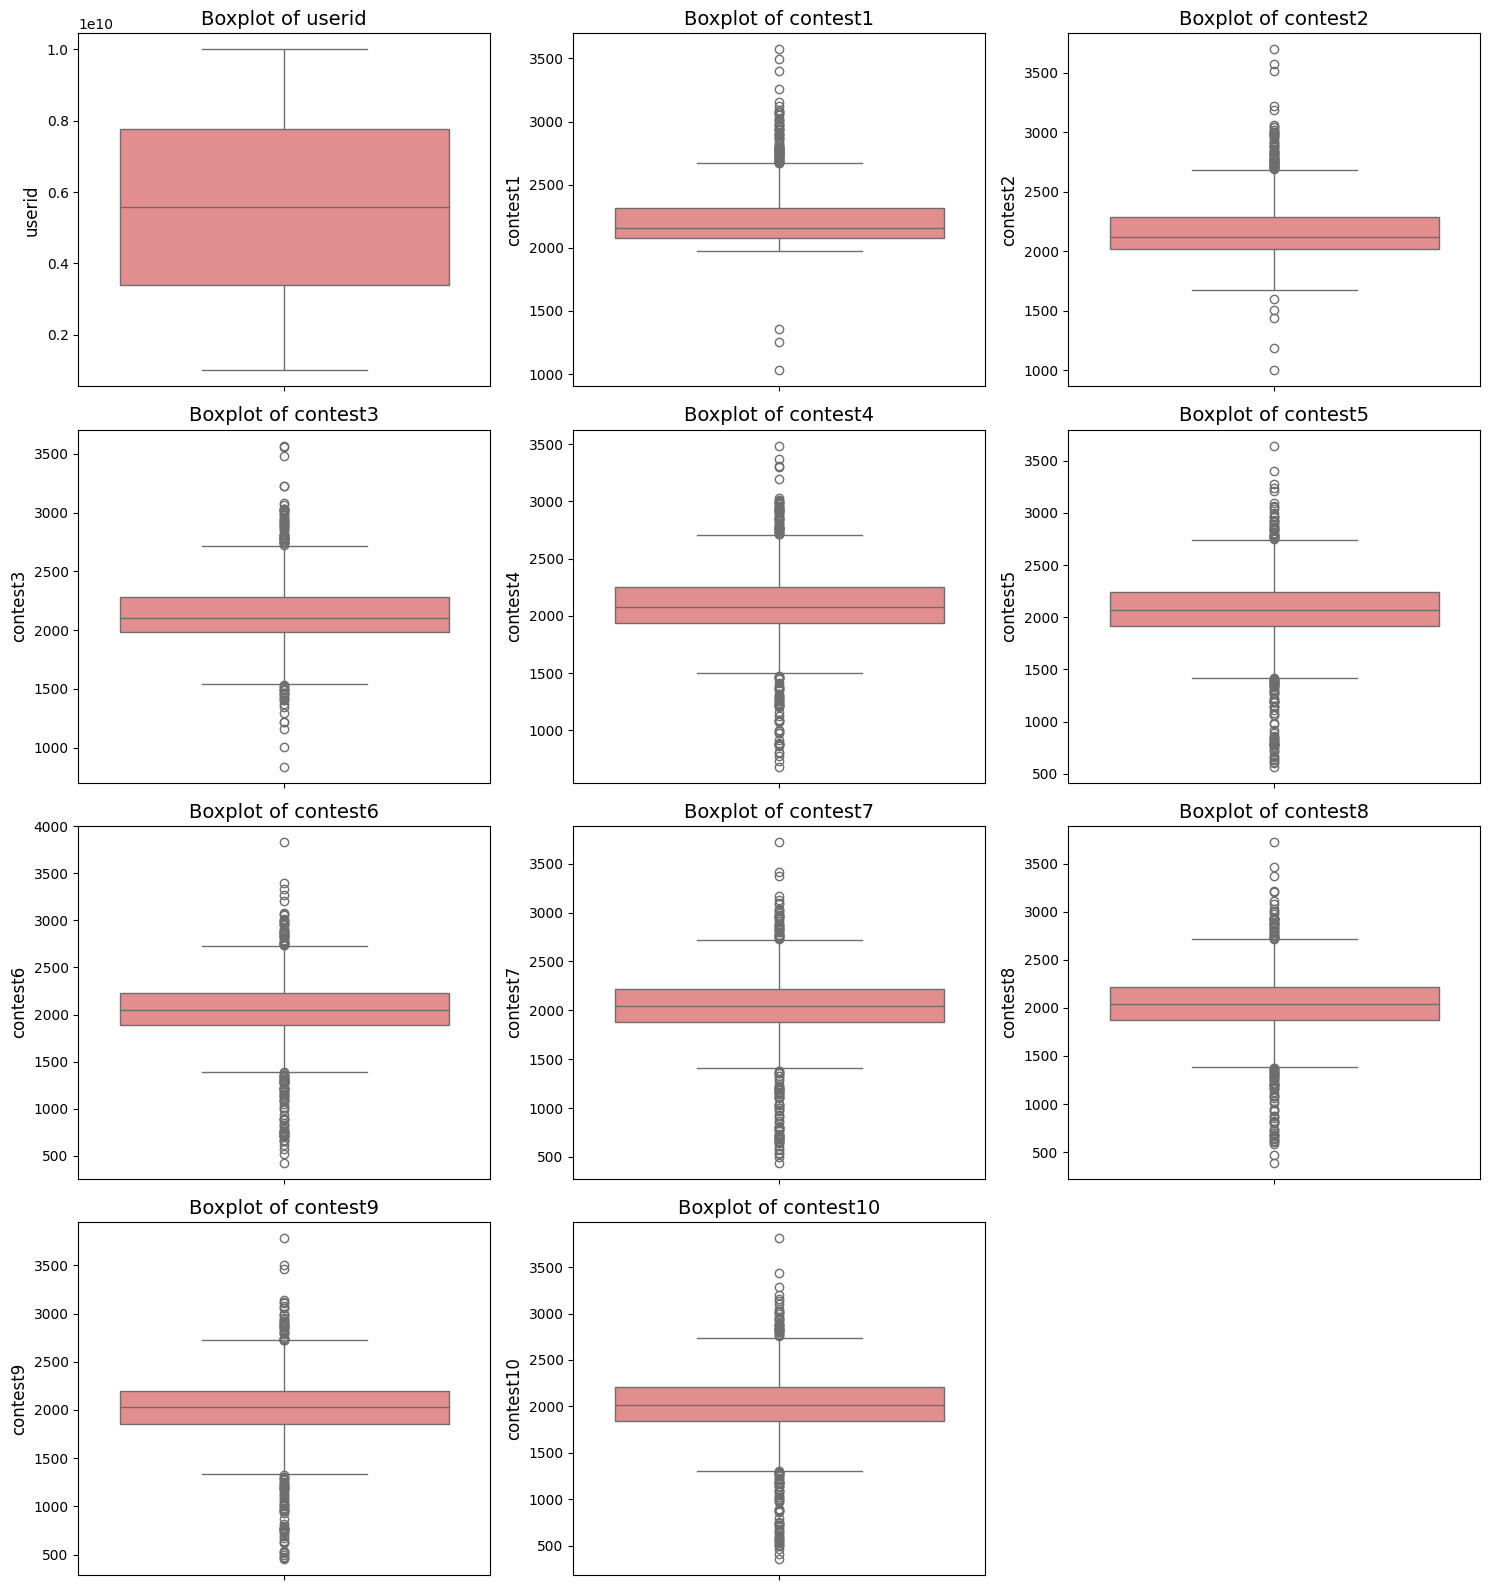

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

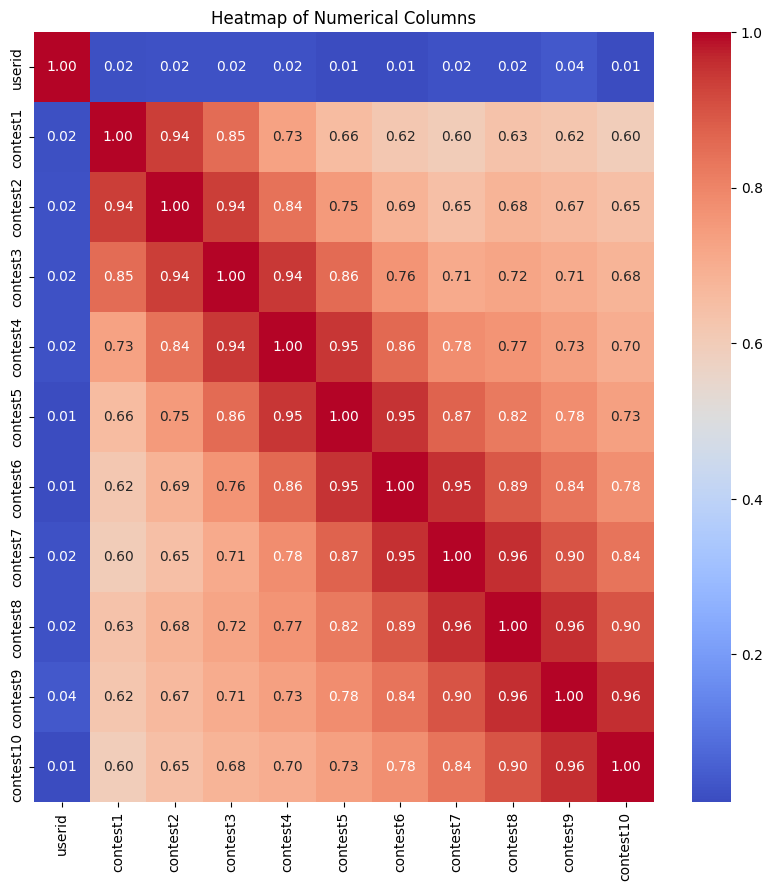

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [19]:
# Dropping unwanted columns

df.drop(columns=['userid'], inplace=True)

In [21]:
# Filling na values with mean for numeric columns only

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [22]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [23]:
X = df.drop(columns=['rank-type'])
y = df['rank-type']

In [27]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [29]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [31]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8666666666666667, 0.5719298245614035, 0.9929824561403509, 0.9824561403508771, 0.9263157894736842, 1.0, 1.0, 1.0, 0.8385964912280702]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        80
           1       0.71      0.82      0.76        45
           2       0.61      0.61      0.61        18
           3       0.71      0.56      0.62        27
           4       0.00      0.00      0.00         3
           5       0.92      0.98      0.95       112

    accuracy                           0.87       285
   macro avg       0.66      0.65      0.65       285
weighted avg       0.86      0.87      0.86       285

Confusion Matrix:
 [[ 74   0   0   0   0   6]
 [  0  37   4   4   0   0]
 [  0   7  11   0   0   0]
 [  0   8   0  15   0   4]
 [  0   0   3   0   0   0]
 [  0   0   0   2   0 110]]


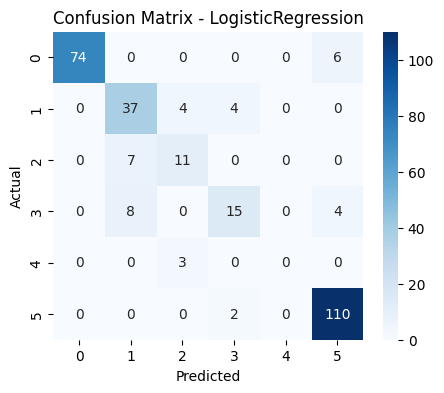

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        80
           1       0.33      0.20      0.25        45
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         3
           5       0.52      0.80      0.63       112

    accuracy                           0.57       285
   macro avg       0.27      0.30      0.28       285
weighted avg       0.47      0.57      0.50       285

Confusion Matrix:
 [[64  0  0  0  0 16]
 [ 0  9  0  0  0 36]
 [ 0 15  0  0  0  3]
 [ 0  0  0  0  0 27]
 [ 0  3  0  0  0  0]
 [22  0  0  0  0 90]]


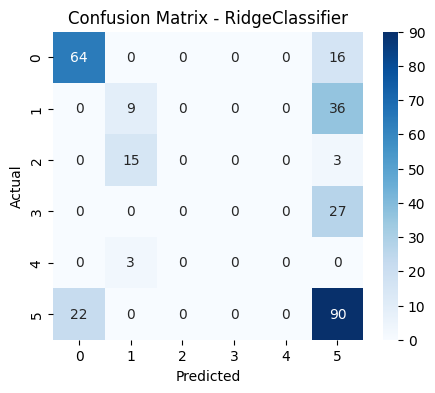

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       0.96      0.96      0.96        27
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       112

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0  26   0   1]
 [  0   0   0   0   3   0]
 [  0   0   0   1   0 111]]


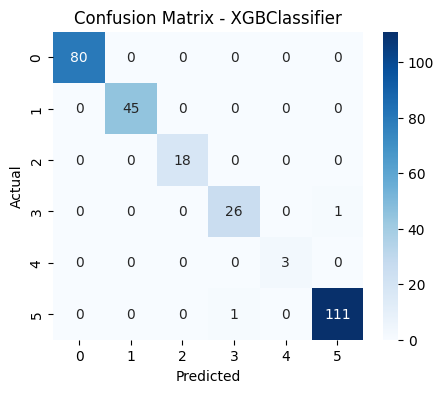

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       0.98      1.00      0.99        45
           2       1.00      0.94      0.97        18
           3       0.96      0.96      0.96        27
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       112

    accuracy                           0.99       285
   macro avg       0.99      0.98      0.99       285
weighted avg       0.99      0.99      0.99       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   1  17   0   0   0]
 [  0   0   0  26   0   1]
 [  0   0   0   0   3   0]
 [  0   0   0   1   0 111]]


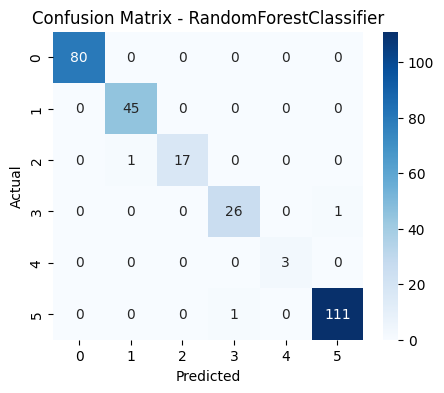

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       0.68      1.00      0.81        45
           2       0.00      0.00      0.00        18
           3       1.00      1.00      1.00        27
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00       112

    accuracy                           0.93       285
   macro avg       0.61      0.67      0.64       285
weighted avg       0.88      0.93      0.90       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0  18   0   0   0   0]
 [  0   0   0  27   0   0]
 [  0   3   0   0   0   0]
 [  0   0   0   0   0 112]]


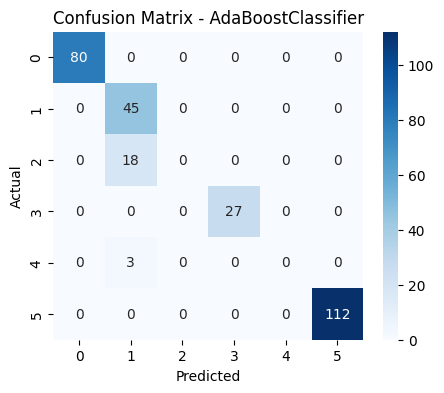

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00       112

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0  27   0   0]
 [  0   0   0   0   3   0]
 [  0   0   0   0   0 112]]


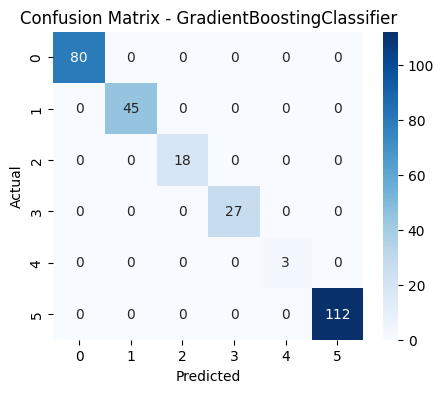

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00       112

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0  27   0   0]
 [  0   0   0   0   3   0]
 [  0   0   0   0   0 112]]


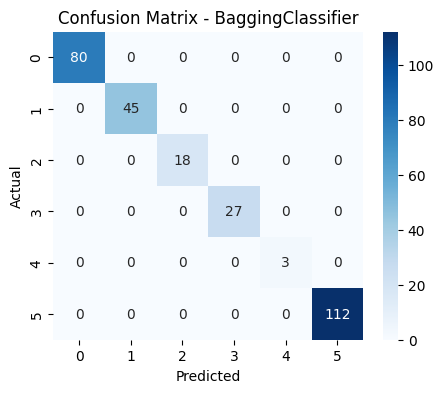

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00       112

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285

Confusion Matrix:
 [[ 80   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0  18   0   0   0]
 [  0   0   0  27   0   0]
 [  0   0   0   0   3   0]
 [  0   0   0   0   0 112]]


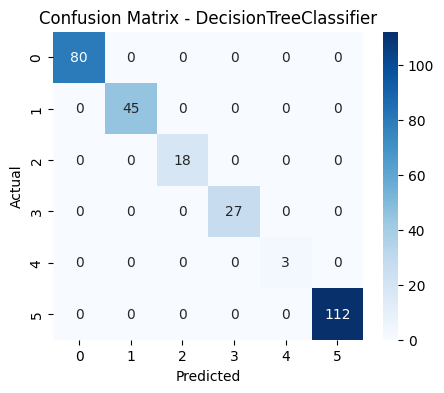

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        80
           1       0.70      0.69      0.70        45
           2       0.65      0.61      0.63        18
           3       0.54      0.70      0.61        27
           4       0.00      0.00      0.00         3
           5       0.91      0.95      0.93       112

    accuracy                           0.84       285
   macro avg       0.63      0.64      0.63       285
weighted avg       0.84      0.84      0.84       285

Confusion Matrix:
 [[ 72   0   0   0   0   8]
 [  0  31   3  11   0   0]
 [  0   7  11   0   0   0]
 [  0   6   0  19   0   2]
 [  0   0   3   0   0   0]
 [  1   0   0   5   0 106]]


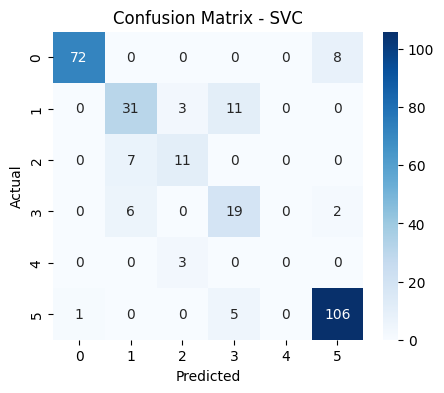

In [32]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()